In [1]:
#!pip install qiskit

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from qiskit import IBMQ,BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister,execute

from qiskit.tools.visualization import plot_histogram

In [7]:
IBMQ.save_account('token')#token

Credentials already present. Set overwrite=True to overwrite.


In [8]:
''' 
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram
'''


' \n#initialization\nimport matplotlib.pyplot as plt\n%matplotlib inline\nimport numpy as np\nimport math\n\n# importing Qiskit\nfrom qiskit import IBMQ, BasicAer\nfrom qiskit.providers.ibmq import least_busy\nfrom qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute\n\n# import basic plot tools\nfrom qiskit.tools.visualization import plot_histogram\n'

In [9]:
#qiskit1

In [23]:
#qubits 0 and 1 are ancilla and qubit 2 is eigenstate of unitary
#initialized 6 state 1 by applying X gate

q=QuantumRegister(3)
c=ClassicalRegister(2)

qpe=QuantumCircuit(q,c)
qpe.x(q[2])

qpe.barrier()

In [24]:
#Hadamart gate on ancilla
qpe.h(q[0])
qpe.h(q[1])

qpe.barrier()

In [25]:
#controlled unitary from q[0]is the identity matrix 
#controlled unitary from q[1] is a controlled-Z gate

qpe.cz(q[1],q[2])

In [26]:
# apply quantum inverse fourier trasform . adapt qft code to qft transpose conjugate
def qft(circ,q,n):
    """n-qbit QFT om q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(mah.pi/flost(2*g(k-j)),q[k],q[j])

def qft_dagger(circ,q,n):
    """n-qibit QFTdagger on q in circ."""
    for j in range(n):
        k=(n-1)-j
        for m in range(k):
            circ.cu1(-math.pi/float(2**(k-m)),q[k],q[m])
            circ.h(q[k])
            

In [27]:
qft_dagger(qpe, q, 2)
qpe.barrier()

#measurement
qpe.measure(q[0],c[0])
qpe.measure(q[1],c[1])

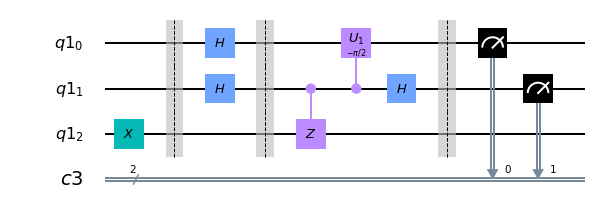

In [28]:
qpe.draw(output="mpl")

In [29]:
#qiskit2

In [30]:
#more ancilla qbit (3) and a two qbit state 
#unitary operation will be U=C-Z iar penteu 11 o sa primim theta =0,5 
#we implement C-U gate (C-C-Z) from C-C-X gate (Toffoli) by using the relation HXH=Z

nancilla=4
q2=QuantumRegister(nancilla+2,'q')
c2=ClassicalRegister(nancilla,'c')

qpe2=QuantumCircuit(q2,c2)
qpe2.x([nancilla])
qpe2.x(q2[nancilla+1])

qpe2.barrier()

In [31]:
for i in range(nancilla):
    qpe2.h(q2[i])

qpe2.barrier()

In [32]:
# controlled unitary operations
# controlled unitary from q[0] is the identity matrix
# controlled unitary from q[1] is the identity matrix
# controlled unitary from q[2] is a controlled-Z gate
qpe2.h(q2[nancilla+1])
qpe2.ccx(q2[nancilla-1], q2[nancilla], q2[nancilla+1])
qpe2.h(q2[nancilla+1])

qpe2.barrier()

In [33]:
qft_dagger(qpe2, q2, nancilla)

qpe2.barrier()

for i in range(nancilla):
    qpe2.measure(q2[i],c2[i])

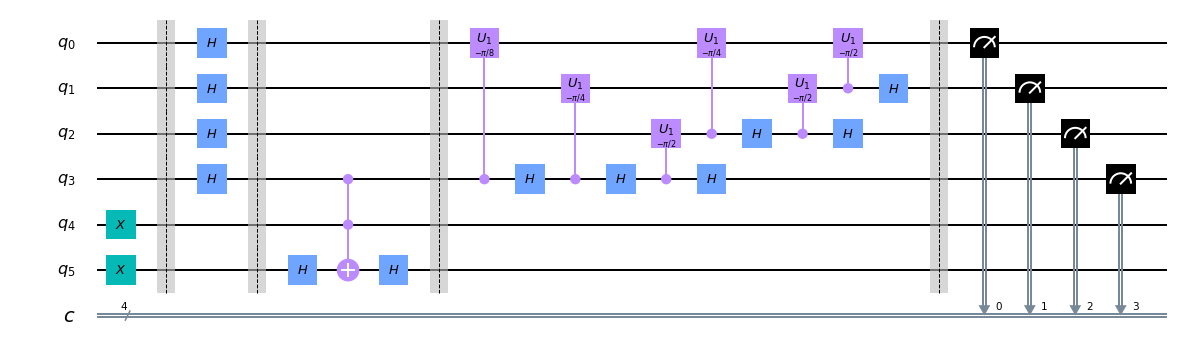

In [34]:
qpe2.draw(output="mpl")

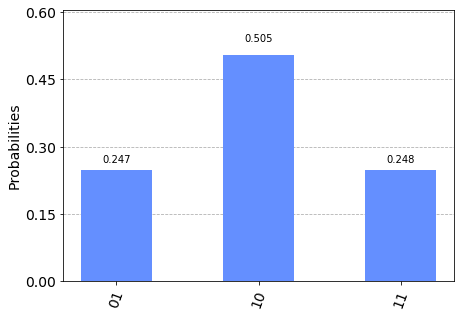

In [35]:
#simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

# 2𝑛𝜃=2^2×0.5=2(10)


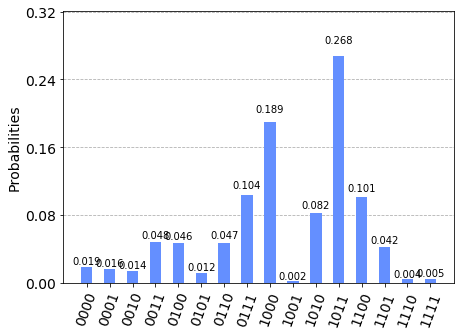

In [36]:
results2 = execute(qpe2, backend=backend, shots=shots).result()
answer2 = results2.get_counts()
plot_histogram(answer2)
# 2𝑛𝜃=2^4×0.5=8(1000)



Credentials already present. Set overwrite=True to overwrite.
Credentials are already in use. The existing account in the session will be replaced.


NameError: name 'provider' is not defined